# Multivariate Predictive Analysis I

# Ordinary Least Squares multiple regression model
### Name: Sunit Jadeja


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import cov
from patsy import dmatrices
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

#  Importing Data & Data Pre-Processing

In [2]:
df=pd.read_excel("/Users/sunitjadeja/Desktop/TISS All Subject/Multivariate Prediction Analysis/Mansi Mam Assignment/End_Semester_Dataset_A06.xlsx")

In [7]:
# print (df.isnull().sum())
# print (df.dtypes)
# print (df.info)
#print (df.columns)
# print (df.head())

year            0
spirits         0
unemp           0
income          0
emppop          0
beertax         0
drinkage        0
dry             0
youngdrivers    0
miles           0
breath          0
jail            1
service         1
fatal           0
nfatal          0
fatal1517       0
nfatal1517      0
fatal2124       0
nfatal2124      0
afatal          0
pop             0
pop1517         0
pop2124         0
milestot        0
unempus         0
emppopus        0
dtype: int64
year              int64
spirits         float64
unemp           float64
income          float64
emppop          float64
beertax         float64
drinkage        float64
dry             float64
youngdrivers    float64
miles           float64
breath           object
jail             object
service          object
fatal             int64
nfatal            int64
fatal1517         int64
nfatal1517        int64
fatal2124         int64
nfatal2124        int64
afatal          float64
pop             float64
pop1517        

# Explanatory Data Analysis (EDA)

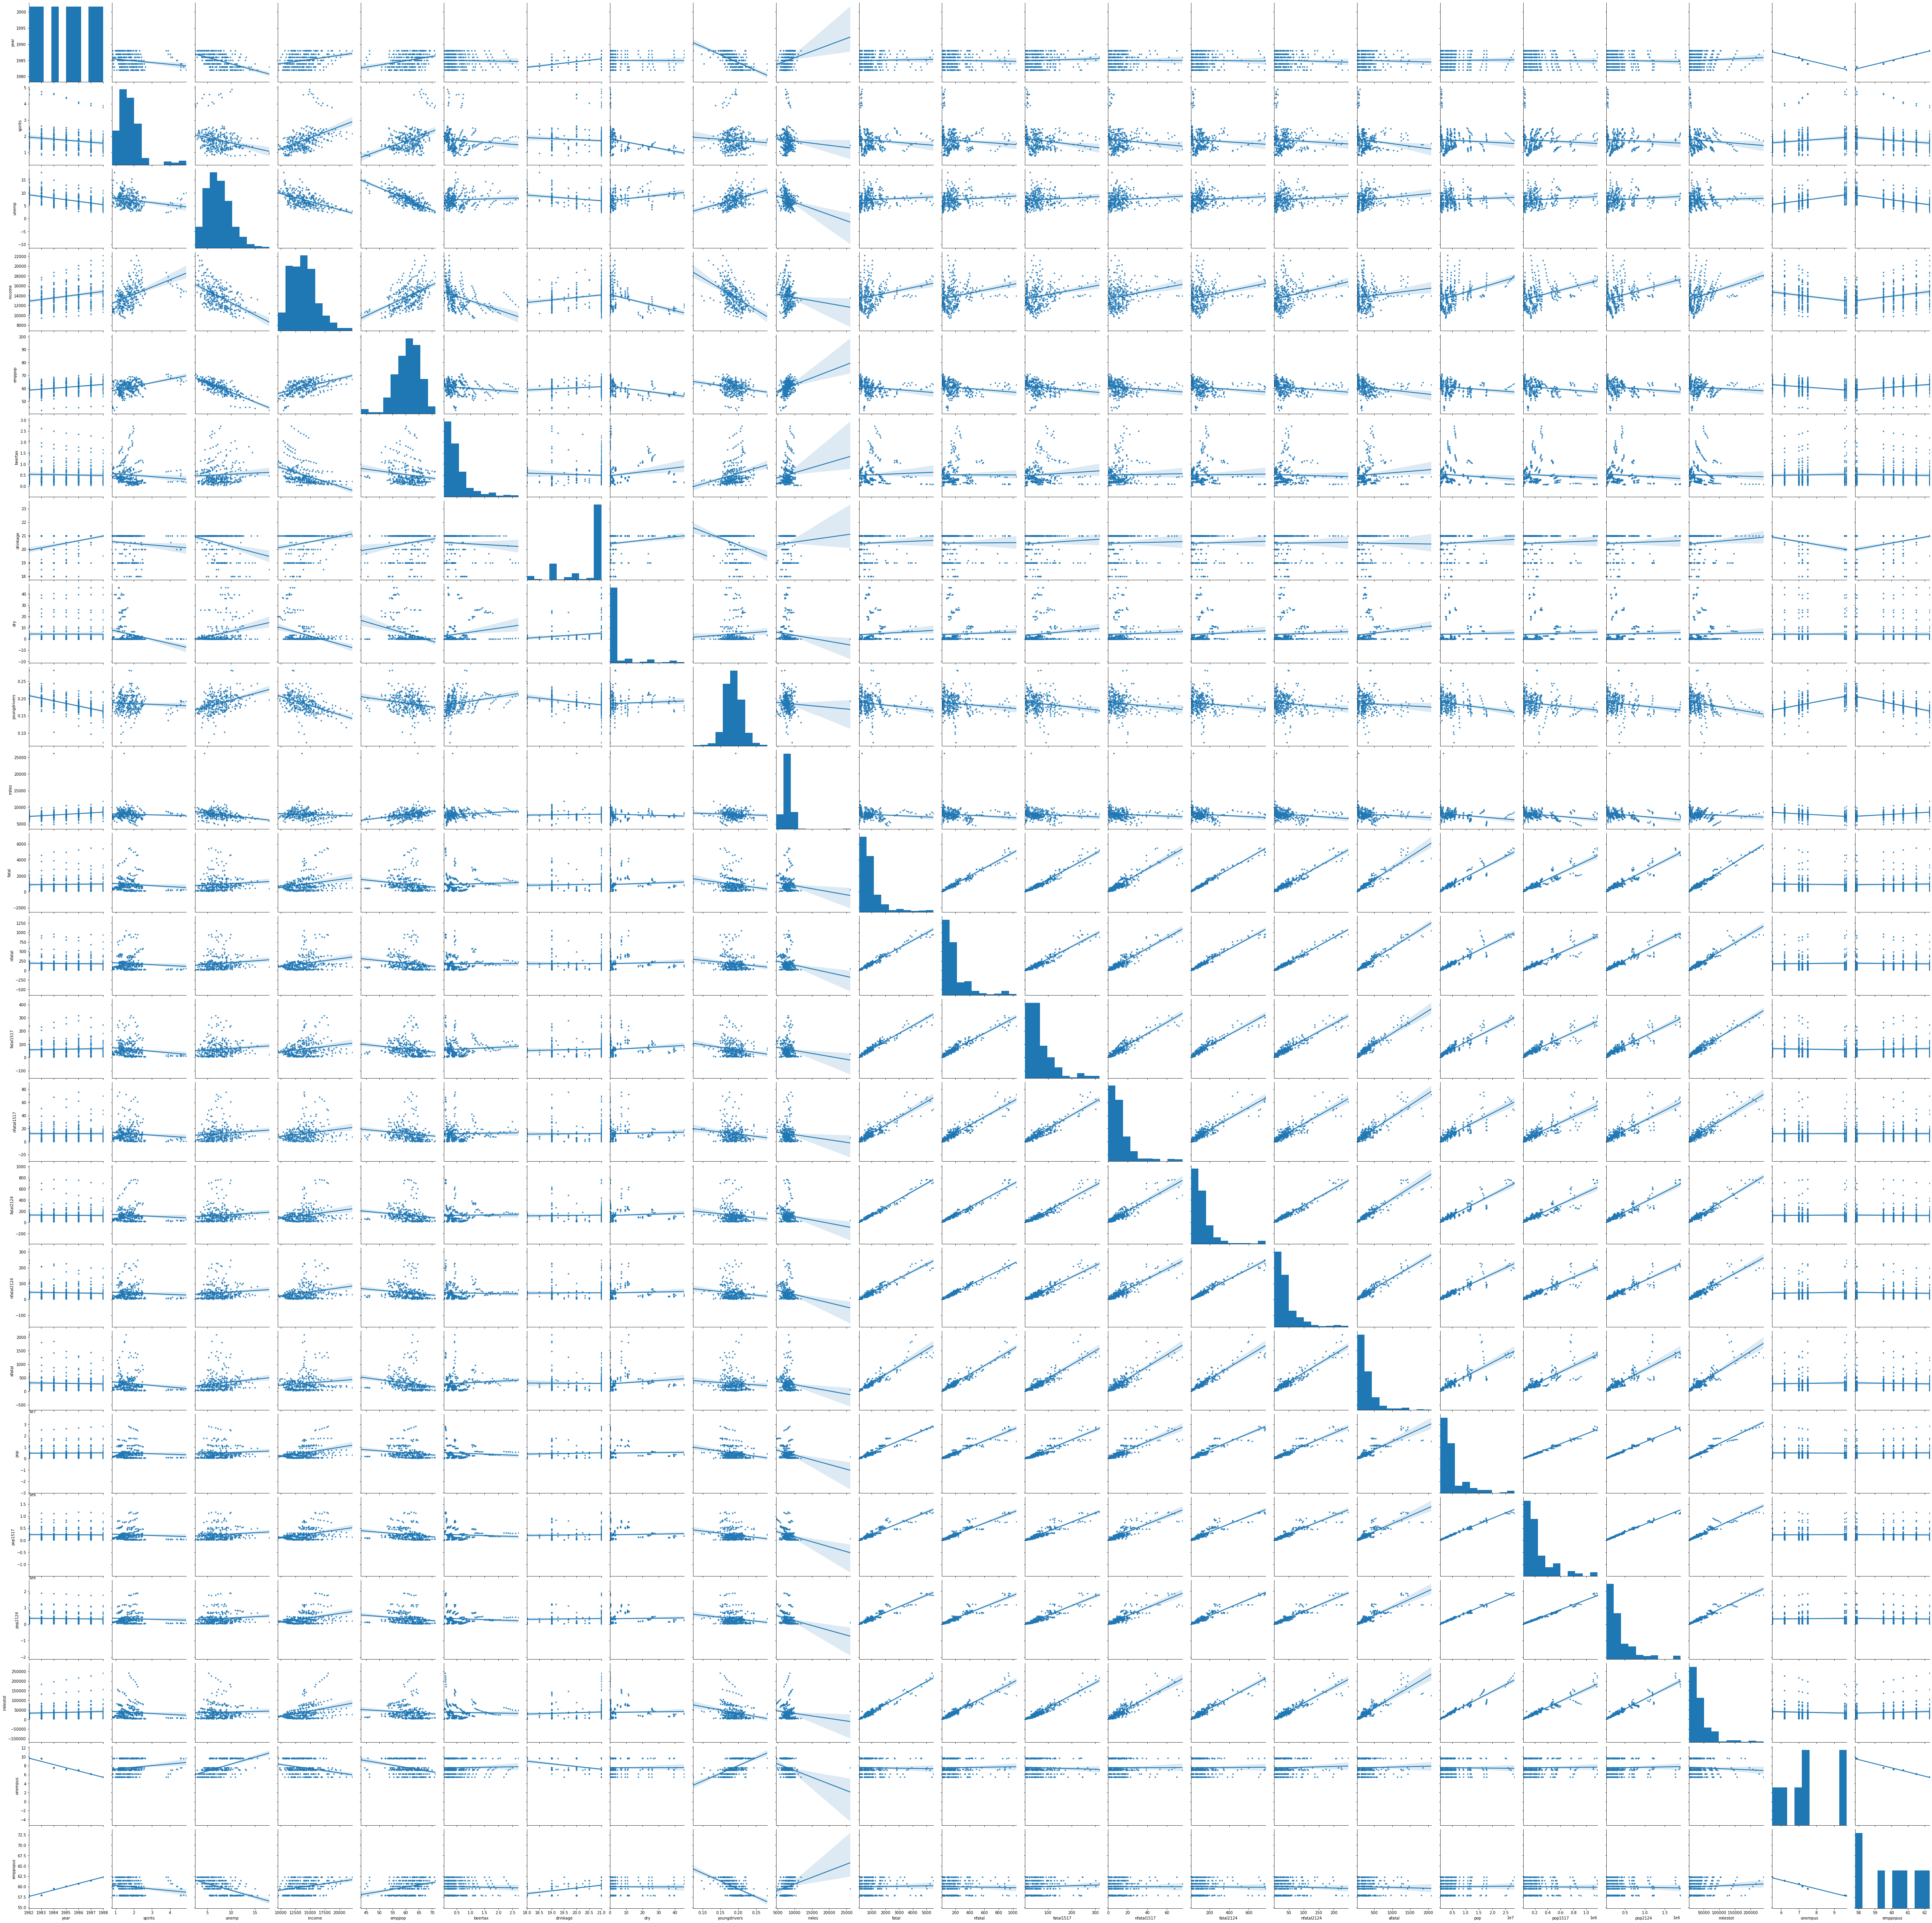

In [8]:
# df_n = df[['year', 'spirits', 'unemp', 'income', 'emppop', 'beertax', 'drinkage',
#        'dry', 'youngdrivers', 'miles', 'fatal',
#        'nfatal', 'fatal1517', 'nfatal1517', 'fatal2124', 'nfatal2124',
#        'afatal', 'pop', 'pop1517', 'pop2124', 'milestot', 'unempus',
#        'emppopus']]
# sns.pairplot(df_n , height=3, kind="reg",markers=".")

In [5]:
# corr = df.corr()
# print(corr)

                  year   spirits     unemp    income    emppop   beertax  \
year          1.000000 -0.184443 -0.503908  0.291246  0.312417 -0.036951   
spirits      -0.184443  1.000000 -0.239175  0.452140  0.410547 -0.089469   
unemp        -0.503908 -0.239175  1.000000 -0.553616 -0.800708  0.056772   
income        0.291246  0.452140 -0.553616  1.000000  0.522308 -0.397517   
emppop        0.312417  0.410547 -0.800708  0.522308  1.000000 -0.161917   
beertax      -0.036951 -0.089469  0.056772 -0.397517 -0.161917  1.000000   
drinkage      0.390256 -0.083810 -0.259604  0.203087  0.164660 -0.060050   
dry          -0.005912 -0.268059  0.256416 -0.343662 -0.339864  0.177618   
youngdrivers -0.605903 -0.058513  0.386417 -0.478407 -0.208529  0.248082   
miles         0.292468 -0.056487 -0.278150 -0.080200  0.320894  0.141951   
fatal         0.030486 -0.093084  0.088134  0.239650 -0.175958  0.050153   
nfatal       -0.031217 -0.086093  0.125156  0.246753 -0.181959 -0.000931   
fatal1517   

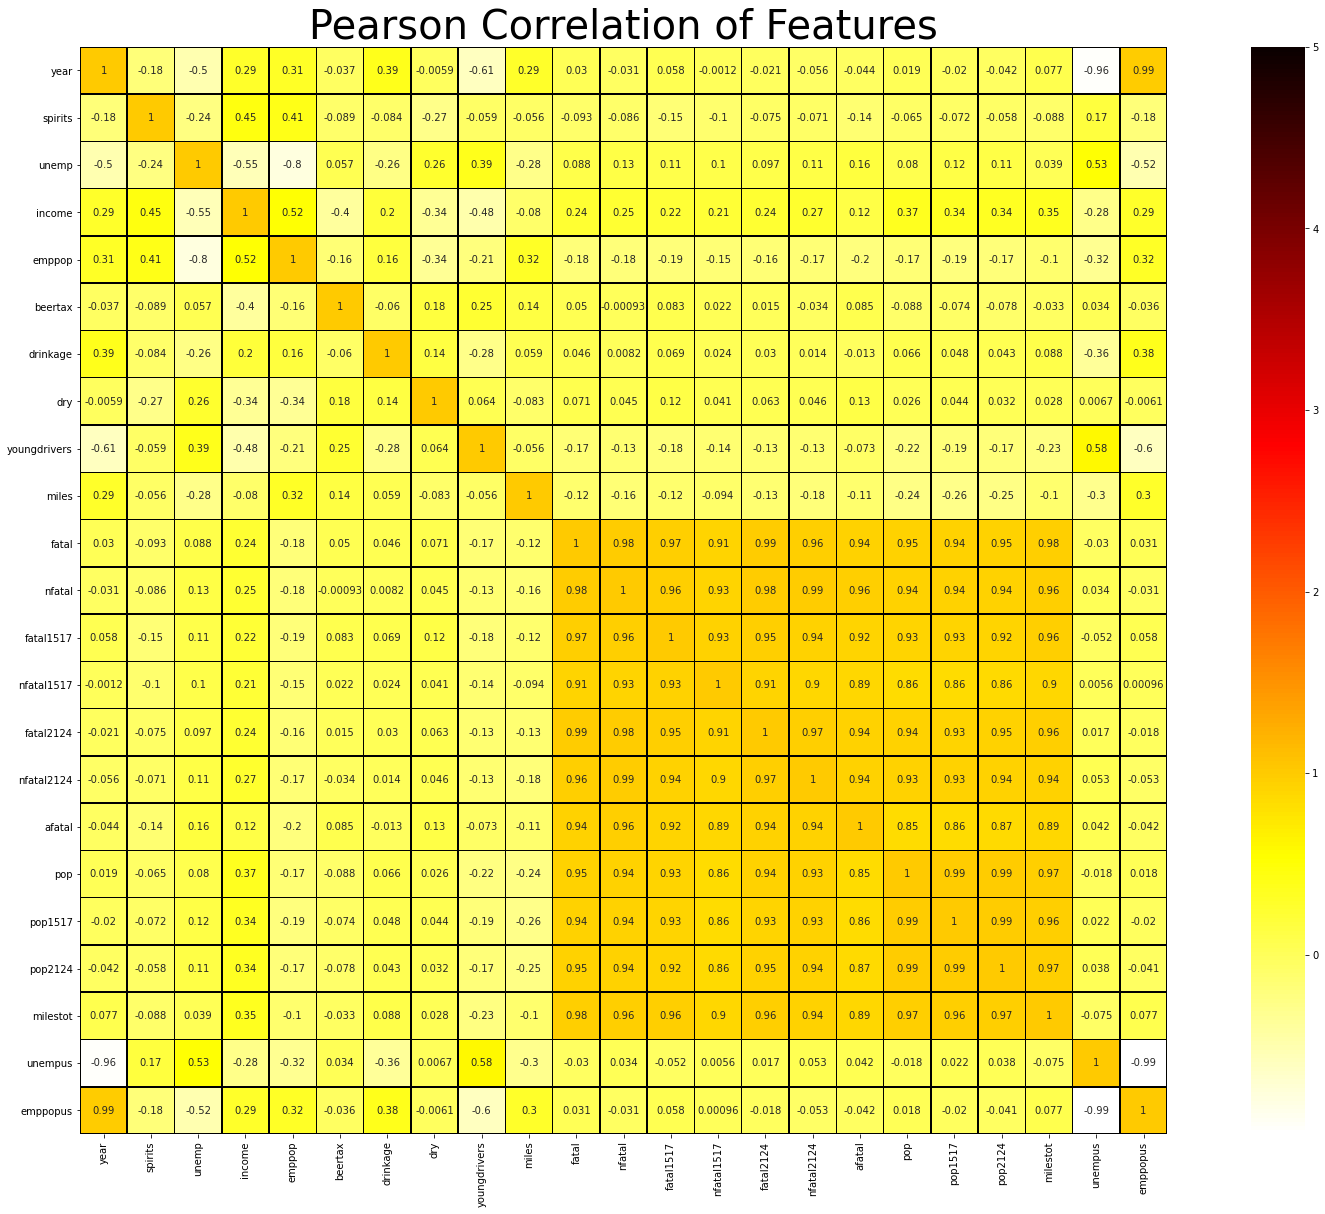

In [64]:
# plt.figure(figsize=(30,20))
# plt.title('Pearson Correlation of Features', y=1, size=40)
# sns.heatmap(corr ,linewidths=0.5,vmax=5.0,square=True, cmap='hot_r', linecolor='Black',annot=True)

# Stepwise Regression & Final Explanatory Variables For Model Builiding 

In [7]:
# x=df[['fatal2124','nfatal2124']]
# y=df[["fatal"]]
# Y = sm.add_constant(x)
# model = sm.OLS(y, x).fit()
# predictions = model.predict(x)
# model.summary()

                        ###Variables for Model Builiding are below#####
# x=df[['fatal2124','fatal1517','milestot','beertax','nfatal','nfatal2124','nfatal1517','emppopus','emppop',
#       'unemp','spirits','income','pop','pop1517']]
# y=df[["fatal"]]



In [3]:
# x=df[['fatal2124','nfatal2124']]
# y=df[["fatal"]]
# Y = sm.add_constant(x)
# model = sm.OLS(y, x).fit()
# predictions = model.predict(x)
# model.summary()

                        ###Variables for Model Builiding are below#####
x=df[['fatal2124','fatal1517','milestot','beertax','nfatal','nfatal2124','nfatal1517','emppopus','emppop',
      'unemp','spirits','income','pop','pop1517']]
y=df[["fatal"]]



#  Assumption 1: Linear functional form
 

In [9]:
# x1=df[['fatal2124','fatal1517','milestot','beertax','nfatal','nfatal2124','nfatal1517','emppopus','emppop','fatal',
#       'unemp','spirits','income','pop','pop1517']]
# x1.corr()['fatal']

fatal2124     0.989236
fatal1517     0.970592
milestot      0.976437
beertax       0.050153
nfatal        0.980256
nfatal2124    0.961232
nfatal1517    0.914173
emppopus      0.031188
emppop       -0.175958
fatal         1.000000
unemp         0.088134
spirits      -0.093084
income        0.239650
pop           0.948674
pop1517       0.935276
Name: fatal, dtype: float64

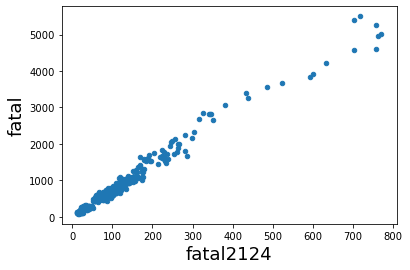

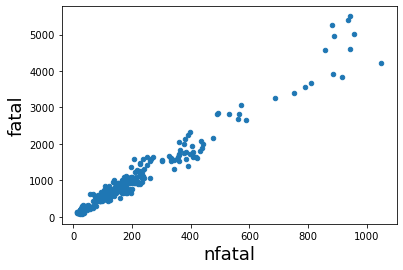

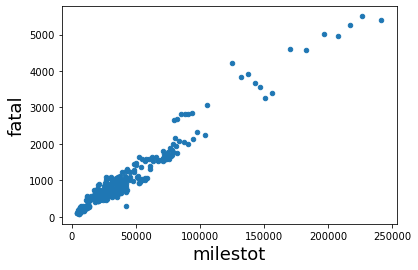

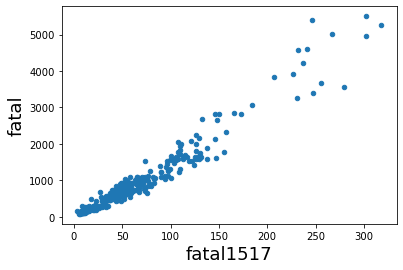

In [10]:
# df.plot.scatter(x='fatal2124', y='fatal')
# plt.xlabel('fatal2124', fontsize=18)
# plt.ylabel('fatal', fontsize=18)
# plt.show()
# df.plot.scatter(x='nfatal', y='fatal')
# plt.xlabel('nfatal', fontsize=18)
# plt.ylabel('fatal', fontsize=18)
# plt.show()
# df.plot.scatter(x='milestot', y='fatal')
# plt.xlabel('milestot', fontsize=18)
# plt.ylabel('fatal', fontsize=18)
# plt.show()
# df.plot.scatter(x='fatal1517', y='fatal')
# plt.xlabel('fatal1517', fontsize=18)
# plt.ylabel('fatal', fontsize=18)
# plt.show()

# Assumption 2: i.i.d. residual errors

In [13]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# X2 = add_constant(df_n)
# pd.Series([variance_inflation_factor(X2.values, i) 
# for i in range(X2.shape[1])], 
# index=X2.columns)

const           6.518086e+07
year            7.552965e+01
spirits         2.364717e+00
unemp           5.901428e+00
income          4.671148e+00
emppop          5.818918e+00
beertax         2.270686e+00
drinkage        1.314611e+00
dry             1.520001e+00
youngdrivers    2.185350e+00
miles           1.972272e+00
fatal           2.875577e+02
nfatal          1.984983e+02
fatal1517       4.214090e+01
nfatal1517      1.170714e+01
fatal2124       1.633082e+02
nfatal2124      7.617032e+01
afatal          2.658556e+01
pop             5.923636e+02
pop1517         3.231480e+02
pop2124         3.145150e+02
milestot        1.007407e+02
unempus         8.434329e+01
emppopus        2.538880e+02
dtype: float64

In [10]:
X=pd.DataFrame(np.c_[df['fatal2124'],df['fatal1517'],df['milestot'],df['beertax'],df['nfatal'],df['nfatal2124'],df['nfatal1517'],df['emppopus'],df['emppop']
     df['unemp'],df['spirits'],df['income'],df['pop'],df['pop1517']], columns=['fatal2124','fatal1517','milestot','beertax','nfatal','nfatal2124','nfatal1517','emppopus','emppop',
      'unemp','spirits','income','pop','pop1517'])
y=df["fatal"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
lin_reg_mod = LinearRegression()
reg=lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)
print("rmse",test_set_rmse)
print("r2",test_set_r2)
print('Slope:' ,lin_reg_mod.coef_)
print('Intercept:', lin_reg_mod.intercept_)

rmse 69.89822855623622
r2 0.9950972485634122
Slope: [ 3.68724532e+00  3.00779551e+00  1.30094093e-03  5.75335336e+01
  2.54830704e+00 -6.80665507e+00 -4.55394802e+00  8.81126348e+00
 -6.65295390e+00 -7.80661232e+00  2.53077450e+01 -6.59371009e-03
  1.10822131e-04 -1.99486721e-03]
Intercept: -36.94138146149953


# OLS Model

In [4]:
x=df[['fatal2124','fatal1517','milestot','beertax','nfatal','nfatal2124','nfatal1517','emppopus','emppop','unemp','spirits','income','pop','pop1517']]
y=df[["fatal"]]
Y = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()
####OLS_Model_3 = sm.OLS(Y3,XCons_3).fit()
###print(OLS_Model_3.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  fatal   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.184e+04
Date:                Thu, 29 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:22:39   Log-Likelihood:                         -1840.8
No. Observations:                 336   AIC:                                      3710.
Df Residuals:                     322   BIC:                                      3763.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fatal2124      3.5946      0.173     20.811      0.000       3.255       3.934
fatal1517      2.7082      0.322      8.407      0.000       2.074       3.342
milestot       0.0018      0.001      2.515      0.012       0.000       0.003
beertax       58.8037      8.758      6.715      0.000      41.575      76.033
nfatal         2.4398      0.143     17.061      0.000       2.159       2.721
nfatal2124    -6.1259      0.542    -11.297      0.000      -7.193      -5.059
nfatal1517    -4.0803      0.843     -4.839      0.000      -5.739      -2.421
emppopus       8.8350      1.464      6.033      0.000       5.954      11.716
emppop        -6.9677      1.215     -5.734      0.000      -9.358      -4.577
unemp         -8.0988      2.055     -3.942      0.000     -12.141      -4.057
spirits       26.3137      6.855      3.839      0.000      12.827      39.800
income        -0.0077      0.003     -2.667      0.008      -0.013      -0.002
pop            0.0001   1.08e-05     10.071      0.000    8.77e-05       0.000
pop1517       -0.0020      0.000    -10.083      0.000      -0.002      -0.002
==============================================================================
Omnibus:                        8.701   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               15.121
Skew:                           0.045   Prob(JB):                     0.000521
Kurtosis:                       4.035   Cond. No.                     2.02e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

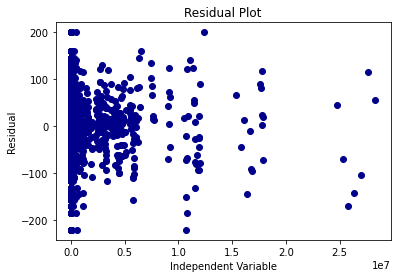

In [16]:
# y_predicted = reg.predict(X)
# residuals = y-y_predicted
# plt.plot(X,residuals, 'o', color='darkblue')
# plt.title("Residual Plot")
# plt.xlabel("Independent Variable")
# plt.ylabel("Residual")


Text(0, 0.5, 'Residual')

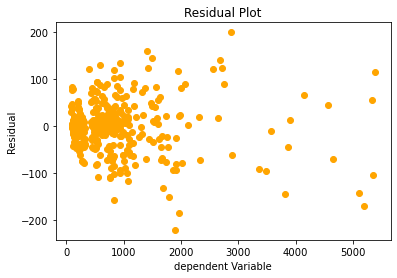

In [17]:
# y_predicted = reg.predict(X)
# plt.plot(y_predicted,residuals, 'o', color='orange')
# plt.title("Residual Plot")
# plt.xlabel("dependent Variable")
# plt.ylabel("Residual")

Text(0, 0.5, 'fatal')

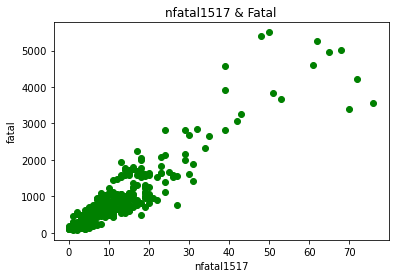

In [42]:
# plt.scatter(df. nfatal1517, df.fatal, color='green',)
# plt.title("nfatal1517 & Fatal")
# plt.xlabel("nfatal1517")
# plt.ylabel("fatal")

# MultiCollinearity

In [43]:
# x=df[['fatal2124','fatal1517','milestot','beertax','nfatal','nfatal2124','nfatal1517','emppopus','emppop',
#       'unemp','spirits','income','pop','pop1517']]
# # y=df[["fatal"]]


In [44]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# X2 = add_constant(x)
# pd.Series([variance_inflation_factor(X2.values, i) 
# for i in range(X2.shape[1])], 
# index=X2.columns)

const         4456.252993
fatal2124       50.439083
fatal1517       31.321077
milestot        74.438612
beertax          1.782427
nfatal          69.605527
nfatal2124      51.828659
nfatal1517      10.231586
emppopus         2.008144
emppop           4.458352
unemp            4.941872
spirits          2.099834
income           4.110475
pop            291.327866
pop1517        196.001678
dtype: float64

In [46]:
# x1=df[['fatal2124','fatal1517','milestot','beertax','nfatal','nfatal2124','nfatal1517','emppopus','emppop',
#       'unemp','spirits','income']]

In [47]:
# X2 = add_constant(x1)
# pd.Series([variance_inflation_factor(X2.values, i) 
# for i in range(X2.shape[1])], 
# index=X2.columns)

const         4049.672375
fatal2124       43.436039
fatal1517       29.003319
milestot        32.948084
beertax          1.622562
nfatal          68.209023
nfatal2124      48.563267
nfatal1517      10.040175
emppopus         1.870348
emppop           3.504911
unemp            4.357220
spirits          2.044357
income           4.001525
dtype: float64

In [48]:
# x2=df[['fatal2124','fatal1517','milestot','beertax','nfatal1517','emppopus','emppop',
#       'unemp','spirits','income']]

In [50]:
# X2 = add_constant(x2)
# pd.Series([variance_inflation_factor(X2.values, i) 
# for i in range(X2.shape[1])], 
# index=X2.columns)

const         3953.703094
fatal2124       23.027933
fatal1517       27.708811
milestot        30.655909
beertax          1.590811
nfatal1517       8.854340
emppopus         1.781973
emppop           3.477664
unemp            4.350152
spirits          1.982100
income           3.694855
dtype: float64

In [52]:
# x3=df[['fatal2124','fatal1517','beertax','nfatal1517','emppopus','emppop',
#       'unemp','spirits','income']]

In [53]:
# X2 = add_constant(x3)
# pd.Series([variance_inflation_factor(X2.values, i) 
# for i in range(X2.shape[1])], 
# index=X2.columns)

const         3799.133280
fatal2124       13.518858
fatal1517       20.909622
beertax          1.576654
nfatal1517       8.619702
emppopus         1.762972
emppop           3.447946
unemp            4.265744
spirits          1.910419
income           3.030354
dtype: float64

In [56]:
# x4=df[['fatal2124','beertax','nfatal1517','emppopus','emppop',
#       'unemp','spirits','income']]

In [57]:
# X2 = add_constant(x4)
# pd.Series([variance_inflation_factor(X2.values, i) 
# for i in range(X2.shape[1])], 
# index=X2.columns)

const         3592.329117
fatal2124        6.179427
beertax          1.375928
nfatal1517       5.999227
emppopus         1.658064
emppop           3.446140
unemp            4.144586
spirits          1.797837
income           2.803979
dtype: float64

In [61]:
# x4=df[['fatal2124','beertax','nfatal1517','emppopus','emppop',
#       'unemp','spirits','income']]
# y=df[["fatal"]]

# Y = sm.add_constant(x4)
# model = sm.OLS(y, x4).fit()
# predictions = model.predict(x4)
# model.summary()

# ###One of the consequences of high multi collinearity that variables t-ratio becomes insignificant which can be seen
# ###for spirits while performing OLS on remaining variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  fatal   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              5201.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:27:58   Log-Likelihood:                         -2075.1
No. Observations:                 336   AIC:                                      4166.
Df Residuals:                     328   BIC:                                      4197.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fatal2124      6.4061      0.121     52.952      0.000       6.168       6.644
beertax       74.5435     15.630      4.769      0.000      43.795     105.292
nfatal1517     5.6818      1.283      4.428      0.000       3.158       8.206
emppopus      15.4598      2.615      5.912      0.000      10.316      20.604
emppop       -16.2509      2.167     -7.499      0.000     -20.514     -11.988
unemp        -16.5361      3.598     -4.596      0.000     -23.614      -9.458
spirits       -4.0768     12.504     -0.326      0.745     -28.675      20.521
income         0.0143      0.005      2.983      0.003       0.005       0.024
==============================================================================
Omnibus:                       44.532   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.472
Skew:                           0.304   Prob(JB):                     4.53e-57
Kurtosis:                       7.262   Cond. No.                     3.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# x5=df[['fatal2124','beertax','nfatal1517','emppopus','emppop',
#       'unemp','income']]
# y=df[["fatal"]]

# Y = sm.add_constant(x5)
# model = sm.OLS(y, x5).fit()
# predictions = model.predict(x5)
# model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  fatal   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              5960.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:28:58   Log-Likelihood:                         -2075.2
No. Observations:                 336   AIC:                                      4164.
Df Residuals:                     329   BIC:                                      4191.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fatal2124      6.4064      0.121     53.027      0.000       6.169       6.644
beertax       73.3073     15.143      4.841      0.000      43.518     103.096
nfatal1517     5.7246      1.275      4.491      0.000       3.217       8.232
emppopus      15.8807      2.271      6.993      0.000      11.414      20.348
emppop       -16.5561      1.952     -8.482      0.000     -20.396     -12.716
unemp        -16.9793      3.327     -5.104      0.000     -23.524     -10.435
income         0.0135      0.004      3.236      0.001       0.005       0.022
==============================================================================
Omnibus:                       44.143   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.505
Skew:                           0.293   Prob(JB):                     7.35e-57
Kurtosis:                       7.257   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Homoscedasticity

In [65]:
# X=pd.DataFrame(np.c_[df['fatal2124'],df['fatal1517'],df['milestot'],df['beertax'],df['nfatal'],df['nfatal2124'],df['nfatal1517'],df['emppopus'],df['emppop'],
#      df['unemp'],df['spirits'],df['income'],df['pop'],df['pop1517']], columns=['fatal2124','fatal1517','milestot','beertax','nfatal','nfatal2124','nfatal1517','emppopus','emppop',
#       'unemp','spirits','income','pop','pop1517'])
# y=df["fatal"]

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
# lin_reg_mod = LinearRegression()
# reg=lin_reg_mod.fit(X_train, y_train)
# pred = lin_reg_mod.predict(X_test)
# test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

# test_set_r2 = r2_score(y_test, pred)
# print("rmse",test_set_rmse)
# print("r2",test_set_r2)
# print('Slope:' ,lin_reg_mod.coef_)
# print('Intercept:', lin_reg_mod.intercept_)

rmse 69.89822855623622
r2 0.9950972485634122
Slope: [ 3.68724532e+00  3.00779551e+00  1.30094093e-03  5.75335336e+01
  2.54830704e+00 -6.80665507e+00 -4.55394802e+00  8.81126348e+00
 -6.65295390e+00 -7.80661232e+00  2.53077450e+01 -6.59371009e-03
  1.10822131e-04 -1.99486721e-03]
Intercept: -36.94138146149953


Text(0, 0.5, 'Residual')

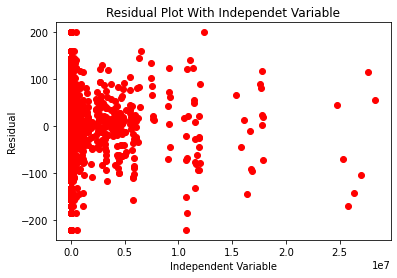

In [71]:
# y_predicted = reg.predict(X)
# residuals = y-y_predicted
# plt.plot(X,residuals, 'o', color='red')
# plt.title("Residual Plot With Independet Variable")
# plt.xlabel("Independent Variable")
# plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

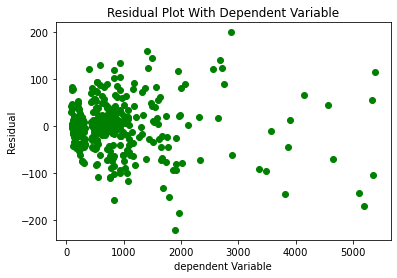

In [97]:
# y_predicted = reg.predict(X)
# plt.plot(y_predicted,residuals, 'o', color='green')
# plt.title("Residual Plot With Dependent Variable")
# plt.xlabel("dependent Variable")
# plt.ylabel("Residual")

Text(0, 0.5, 'Residual')

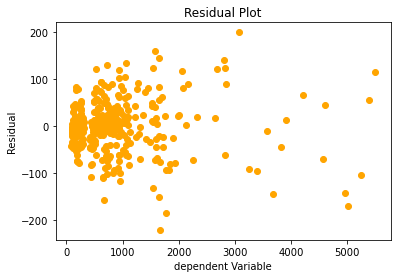

In [98]:
# plt.plot(y,residuals, 'o', color='orange')
# plt.title("Residual Plot")
# plt.xlabel("dependent Variable")
# plt.ylabel("Residual")

# BP Test

In [122]:
# from statsmodels.stats.diagnostic import het_breuschpagan
# bp_test = het_breuschpagan(residuals,X)
# labels = ['LM Statistic', 'LM-Test_p-value', 'F-Statistic', 'F-Test p-value']
# print(dict(zip(labels, bp_test)))

{'LM Statistic': 134.78882790910822, 'LM-Test_p-value': 2.3203850773193304e-22, 'F-Statistic': 15.407410084113435, 'F-Test p-value': 1.703036275238335e-28}


# Durbin-Watson Test 

In [14]:
# from statsmodels.stats.stattools import durbin_watson
# durbin_watson(model.resid)